In [20]:
import os, glob, sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [21]:
df = pd.read_csv(os.path.join("Dataset For Model",'Heart Disease Data.csv'), header = 0)
sqlite3_dataset = pd.read_csv(os.path.join("Dataset For Model",'Heart Disease Data.csv'), header = 0)
df['Sex'] = df['Sex'].map({'Female':0, 'Male':1 })
df['Chest Pain Type'] = df['Chest Pain Type'].map({'No Pain':0, 'Typical Angina':1, 'Atypical Angina':2, 'Non-Anginal Pain':3, 'Asymptomatic':3})
df['Fasting Blood Sugar'] = df['Fasting Blood Sugar'].map({'< 120 mg/dl':0, '> 120 mg/dl':1})
df['Resting Electrocardiographic Results'] = df['Resting Electrocardiographic Results'].map({'Normal':1, 'ST-T Change':2, 'Left Ventricular Hypertrophy':3})
df['Exercise Induced Angina'] = df['Exercise Induced Angina'].map({'No Angina':0, 'Angina':1})
df['The slope of the peak exercise ST segment'] = df['The slope of the peak exercise ST segment'].map({'Down Slope':0 ,'Flat Slope':1, 'Up Slope':2})
df['Thallium Test Result'] = df['Thallium Test Result'].map({'Normal':3, 'Reversible Defect':2, 'Fixed Defect':1, 'Unknown':0})
df['Thallium Test Result'] = df['Thallium Test Result'].fillna(df['Thallium Test Result'].mean())
df['Result'] = df['Result'].map({'Heart Disease':1, 'No Heart Disease':0})

(0.0, 20.0)

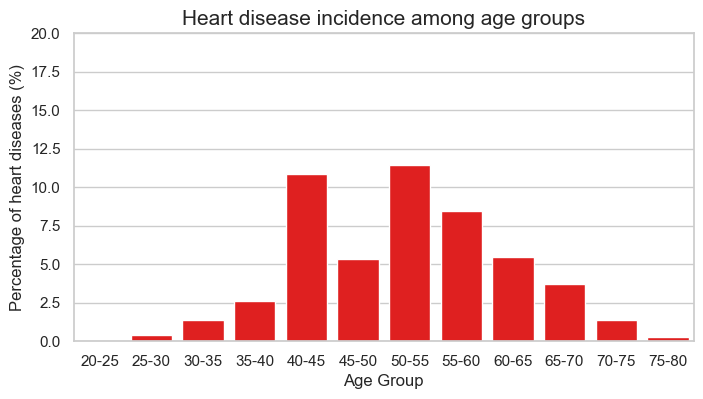

In [22]:
df['Age Group'] = pd.cut(df['Age'], bins=[20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80], 
                         labels=['20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75-80']) #Phân loại các nhóm tuổi

Age_Group_Heart_Disease = df.groupby('Age Group', observed=False)['Result'].sum()
Age_Group_Percentage = (Age_Group_Heart_Disease / df.shape[0]) * 100

sns.set_theme(style="whitegrid") # Cài Theme cho biểu đồ 
plt.figure(figsize=(8, 4)) # Cài Size cho biểu đồ
sns.barplot(x=Age_Group_Percentage.index, y=Age_Group_Percentage.values, color="Red") # Tạo các thành phần cho biểu đồ
plt.title('Heart disease incidence among age groups', fontsize=15) # Tạo tiêu đề cho biểu đồ
plt.xlabel('Age Group', fontsize = 12) # Đặt tên hoặc thành phần cho trục x
plt.ylabel('Percentage of heart diseases (%)', fontsize = 12) # Đặt tên hoặc thành phần cho trục y
plt.ylim(0, 20)

In [23]:
class SQLite3:
    def __init__(self, Dataset , Name):
        self.Dataset = Dataset
        self.Name = Name
        
    def SQLite3_Connection(self):
        if self.Name + ".db" not in glob.glob("*db"):
            Connection = sqlite3.connect(self.Name + ".db")
            self.Dataset.to_sql(self.Name, Connection, if_exists='replace', index=False)
            print("Database already created!")
            return Connection
        else: return sqlite3.connect(self.Name + ".db")

    def Exc(self, Query):
        Connection = self.SQLite3_Connection()
        return pd.read_sql_query(Query, Connection)

Table_Name = 'Healthcare Data'
Conn = SQLite3(sqlite3_dataset, Table_Name)
Query = f"""
    SELECT * 
    FROM '{Table_Name}'
"""        
Conn.Exc(Query)

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Serum Cholesterol,Fasting Blood Sugar,Resting Electrocardiographic Results,Maximum Heart Rate Achieved,Exercise Induced Angina,ST depression induced by exercise relative to rest,The slope of the peak exercise ST segment,Number of major vessels (0-4) colored by fluoroscopy,Thallium Test Result,Result
0,52,Male,No Pain,125,212,< 120 mg/dl,ST-T Change,168,No Angina,1.0,Up Slope,2,Normal,No Heart Disease
1,53,Male,No Pain,140,203,> 120 mg/dl,Normal,155,Angina,3.1,Down Slope,0,Normal,No Heart Disease
2,70,Male,No Pain,145,174,< 120 mg/dl,ST-T Change,125,Angina,2.6,Down Slope,0,Normal,No Heart Disease
3,61,Male,No Pain,148,203,< 120 mg/dl,ST-T Change,161,No Angina,0.0,Up Slope,1,Normal,No Heart Disease
4,62,Female,No Pain,138,294,> 120 mg/dl,ST-T Change,106,No Angina,1.9,Flat Slope,3,Reversible Defect,No Heart Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,Typical Angina,140,221,< 120 mg/dl,ST-T Change,164,Angina,0.0,Up Slope,0,Reversible Defect,Heart Disease
1021,60,Male,No Pain,125,258,< 120 mg/dl,Normal,141,Angina,2.8,Flat Slope,1,Normal,No Heart Disease
1022,47,Male,No Pain,110,275,< 120 mg/dl,Normal,118,Angina,1.0,Flat Slope,1,Reversible Defect,No Heart Disease
1023,50,Female,No Pain,110,254,< 120 mg/dl,Normal,159,No Angina,0.0,Up Slope,0,Reversible Defect,Heart Disease


In [24]:
def Stacking_Model(Dataset):
    X = Dataset.drop(columns=['Result', 'Age Group'])
    Y = Dataset['Result']
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    base_models = [
        ('svm', SVC(kernel='rbf', probability=True, random_state=42)),
        ('decision_tree', DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)),
        ('naive_bayes', GaussianNB()),
        ('gradient_boost', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)),
        ('adaboost', AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm='SAMME', random_state=42))
    ]

    meta_model = LogisticRegression()
    stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
    stacking_model.fit(X_train, Y_train)

    Y_pred_test = stacking_model.predict(X_test)
    
    accuracy_test = accuracy_score(Y_test, Y_pred_test)
    print('Accuracy of Prediction : {:.2f}%'.format(accuracy_test * 100))

    return stacking_model

stacking_model = Stacking_Model(df)  # Chạy mô hình để huấn luyện

Accuracy of Prediction : 98.54%


In [25]:
New_Patient_Data  = pd.DataFrame({
    'Age': [45],
    'Sex': [1],  # 1: Male, 0: Female
    'Chest Pain Type': [1],  # 0: No Pain, 1: Typical Angina, 2: Atypical Angina, 3: Non-Anginal Pain
    'Resting Blood Pressure': [139],
    'Serum Cholesterol': [205],
    'Fasting Blood Sugar': [1],  # 0: < 120 mg/dl, 1: > 120 mg/dl
    'Resting Electrocardiographic Results': [2],  # 1: Normal, 2: ST-T Change, 3: Left Ventricular Hypertrophy
    'Maximum Heart Rate Achieved': [167],
    'Exercise Induced Angina': [1],  # 0: No Angina, 1: Angina
    'ST depression induced by exercise relative to rest': [2.3],
    'The slope of the peak exercise ST segment': [1],  # 0: Down Slope, 1: Flat Slope, 2: Up Slope
    'Number of major vessels (0-4) colored by fluoroscopy': [2],
    'Thallium Test Result': [3],  # 3: Normal, 2: Reversible Defect, 1: Fixed Defect, 0: Unknown
})

# Tiền xử lý dữ liệu mới
scaler = StandardScaler()
New_Patient_Data_scaled = scaler.fit_transform(New_Patient_Data)

# Dự đoán với mô hình đã được huấn luyện
Predicted_Heart_Disease = stacking_model.predict(New_Patient_Data_scaled)

# Kết quả dự đoán
print(f'No Heart Disease') if Predicted_Heart_Disease == 0 else print(f'Heart Disease')

Heart Disease
